<a href="https://colab.research.google.com/github/NckolasGomes6696/IPet/blob/main/trabalho_final_MNumericos_EDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import matplotlib.pyplot as plt

In [ ]:
# Constantes
T_0 = 0 ## T_0 = passo inicial, Y(0)
Y_0 = 1 ## Y_0 = valor do passo inicial, 1
## correspende a Y(0) = 1, que seria a condição inicial

T_FINAL = 5
DT = 0.5
DT_EXACT = 0.01

In [ ]:
# Funções
def f(t, y):
    return math.sin(t)**2 * y ##(dy/dt) = sin^2(t)*y

def euler_step(t_i, y_i, dt, f):
    return y_i + dt*f(t_i, y_i)

def rk4_step(t_i, y_i, dt, f):
    k1 = f(t_i, y_i)
    k2 = f(t_i + dt/2, y_i + k1*dt/2)
    k3 = f(t_i + dt/2, y_i + k2*dt/2)
    k4 = f(t_i + dt, y_i + k3*dt)
    return y_i + dt/6*(k1 + 2*k2 + 2*k3 + k4)

def y_exact(t_0, y_0, t): ## ==> y(t) = y(ti)exp(0.5*[(t-ti)-(sintcost - sinticosti)])
    exp_arg = 1/2 * ( (t-t_0) - (math.sin(t)*math.cos(t) - math.sin(t_0)*math.cos(t_0)) )
    return y_0*math.exp(exp_arg)


In [ ]:
# Computando resultados exatos
t = T_0

ys_exact = []
ts_exact = []

while t < T_FINAL:
    ts_exact.append(t)
    ys_exact.append(y_exact(T_0, Y_0, t))
    t += DT_EXACT

In [ ]:
# Computando resultados aproximados
ts = [T_0]
ys = [Y_0]
ys_euler = [Y_0]

y = Y_0
y_euler = Y_0
t = T_0

while t < T_FINAL:
    # Resolução por Runge-Kutta
    y = rk4_step(t, y, DT, f)

    # Resolução por Euler
    y_euler = euler_step(t, y_euler, DT, f)

    # Aumentando t
    t += DT

    # Adicionando resultados
    ts.append(t)
    ys.append(y)
    ys_euler.append(y_euler)

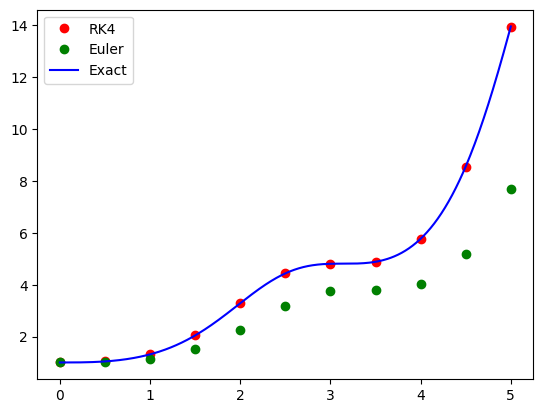

In [ ]:
# Plotting
plt.plot(ts, ys, color='red', marker='o', linewidth=0.0, label='RK4')
plt.plot(ts, ys_euler, color='green', marker='o', linewidth=0.0, label='Euler')
plt.plot(ts_exact, ys_exact, color='blue', label='Exact')
plt.legend()
plt.show()